In [1]:
import os 
import torch
import torchaudio
from IPython.display import Audio
import matplotlib.pyplot as plt 

In [2]:
filename = r'C:\Users\dolemm\OneDrive - Capgemini\Documents\work\train_audio\afrsil1\XC125458.ogg' #os.path.join( "C:", "Users", "dolemm", "OneDrive - Capgemini", "work", "train_audio", "afrsil1", "XC125458.ogg")
waveform, sample_rate = torchaudio.load(filename)

In [3]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)
    
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

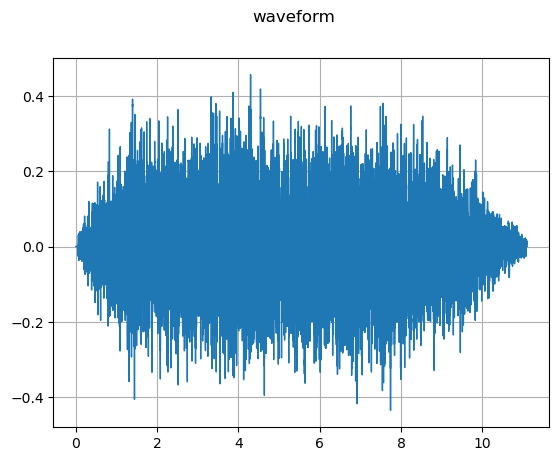

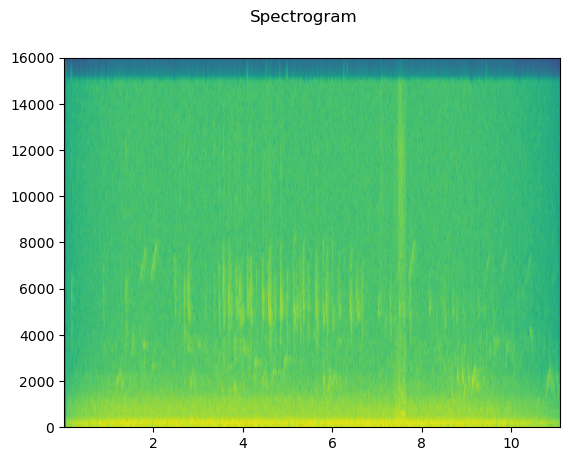

In [4]:
plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)

In [5]:
Audio(waveform.numpy()[0], rate=sample_rate)

In [7]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128

mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    n_mels=n_mels,
    mel_scale="htk",
)

melspec = mel_spectrogram(waveform)

C:\Users\dolemm\AppData\Local\anaconda3\envs\GDSC23\lib\site-packages\torchaudio\transforms\_transforms.py:611: UserWarning: Argument 'onesided' has been deprecated and has no influence on the behavior of this module.
  warnings.warn(


In [9]:
melspec.shape

torch.Size([1, 128, 694])